### 확률적 데이터

 1) 결정론적 데이터
 
  - 항상 같은 값
 
 2) 확률론적 데이터
 
  - 정확히 예측할 수 없는 값
  
#### 데이터가 확률적이 되는 이유
 
  - 여러조건이나 상황에 따라 데이터값이 영향을 받기 때문일 수도 있고
  - 측정시 발생하는 오차 때문일 수도 있다.
  
----
 #### 분포 ( distribution )
 
  - 확률적 데이터에서 어떠한 값이 자주 나오고 어떠한 값이 드물게 나오는가를 나타내는 정보
  
  - 확률분포 : 어떤 사건에 어느정도의 확률이 할당되었는지에 대한 정보

---
 
  - 분포의 시각적 표현
  
   1) 범주형 데이터 : 카운트 플롯 (count plot)
   
   2) 실수형 데이터 : 히스토그램 (histogram)

In [1]:
np.random.seed(0)
x = np.random.normal(size=21)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574,
       -2.55298982])

<function matplotlib.pyplot.show(*args, **kw)>

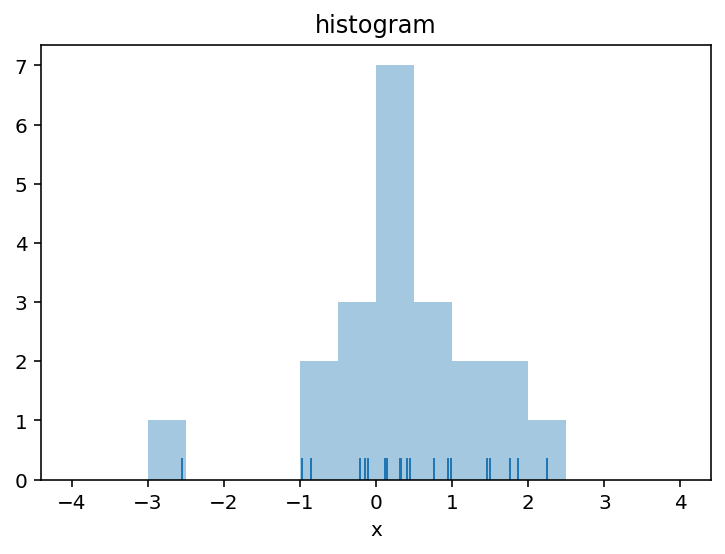

In [2]:
bins = np.linspace(-4, 4, 17)
sns.distplot(x, rug=True, kde=False, bins=bins)
plt.title("histogram")
plt.xlabel("x")
plt.show

#### 기술통계 ( descriptive statistics)

 - 숫자로 분포를 나타내는 것 (묘사한다는 뜻의 '기술')
 - 데이터에서 묘사될 때는 '표본'이라는 말이 붙어야한다. 
 
     1) 표본평균, 표본중앙값, 표본최빈값
     
     2) 표본분산, 표본표준편차
     
     3) 표본왜도, 표본첨도
     
#### 표본평균 (sample mean, sample average)

 - 대표값
 - 일반적으로 부르는 평균의 정확한 명칭
 - 데이터 분포의 대략적인 위치를 나타냄
 
   $ m = \bar x = \frac{1}{N} \sum^N_{i=1}x_i$
   
#### 표본중앙값 (sample median)

 - 데이터를 정렬했을 때 가장 중앙에 위치하는 값
 - 비대칭적으로 되어있는 표본에서 사용 : 경제학에서 많이 나타남 (소득)
 
#### 표본최빈값 ( most frequent value, sample mode)

 - 연속적인 데이터에서는 정의하기 어려움
 - 범주값일 때, 가장 빈번하게 나오는 값을 대표값으로 지정
 
---- 

 - mean() : 표본평균 계산
 - median() : 표본중앙값 계산
 - argmax() : 이산 데이터의 최댓값 계산
 - histogram() : 데이터를 구간으로 나누어 각 구간에 들어가는 데이터 개수 계산

In [3]:
print(f"표본평균 : {np.mean(x)}, 표본중앙값 : {np.median(x)}")

표본평균 : 0.4206524782418389, 표본중앙값 : 0.4001572083672233


In [4]:
ns, _ = np.histogram(x, bins=bins)
m_bin = np.argmax(ns)
print(f"최빈구간 = {bins[m_bin]} ~ {bins[m_bin+1]}")

최빈구간 = 0.0 ~ 0.5


#### 단봉분포(uni-modal)와 다봉분포(multi-modal)

In [13]:
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype='category')
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy

sy
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [19]:
x = df['petal length (cm)'].values
x

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

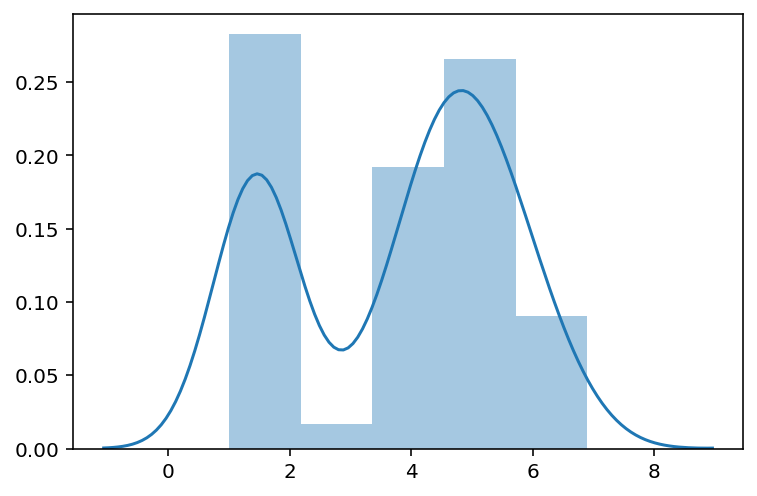

In [26]:
# 꽃잎의 길이 : 다봉분포

bins = (-4, 4, 17)
sns.distplot(x)
plt.show()

In [21]:
s = df[df.species == 'setosa']['petal length (cm)'].values
s

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4])

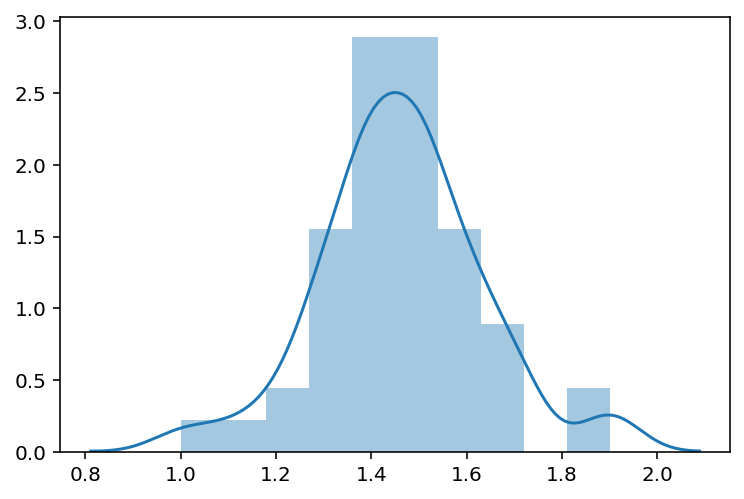

In [24]:
# species - setosa : 단봉분포

bins = (-4, 4, 17)
sns.distplot(s)
plt.show()

#### 대칭분포

 - mean == median
 - mean == median == mode(최빈값)
 - 비대칭으로 만든 데이터가 추가되면 mode < median < mean 순으로 영향을 받는다.

In [29]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [43]:
x = df[df.species == 'virginica']['petal length (cm)']


def sample_statistics(x, n, x_min=0, x_max=10):
    bins = np.linspace(x_min, x_max, n+1)
    ns, _ = np.histogram(x, bins=bins)

    sample_mean = np.mean(x)
    sample_median = np.median(x)
    mode_index = np.argmax(ns)
    sample_mode = 0.5*(bins[mode_index] + bins[mode_index+1])
    print(f"구간이 {n}일때")
    print('mean : ', sample_mean)
    print('median : ', sample_median)
    print('mode : ', sample_mode)

    sns.distplot(x, bins=bins)
    plt.axvline(sample_mean, c='k', ls=':', label='mean')
    plt.axvline(sample_median, c='k', ls='--', label='median')
    plt.axvline(sample_mode, c='k', ls='-', label='mode')
    plt.xlabel('x')
    plt.legend()
    plt.show()

구간이 10일때
mean :  5.552
median :  5.55
mode :  5.5


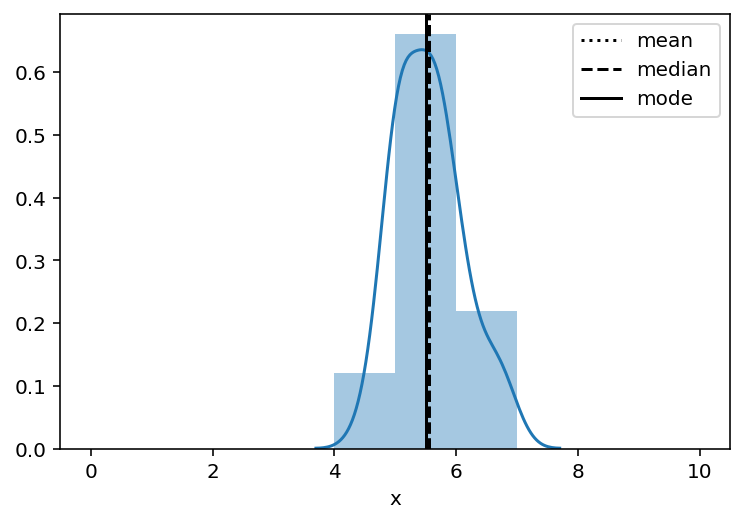

In [44]:
sample_statistics(x, 10)

구간이 50일때
mean :  5.552
median :  5.55
mode :  5.5


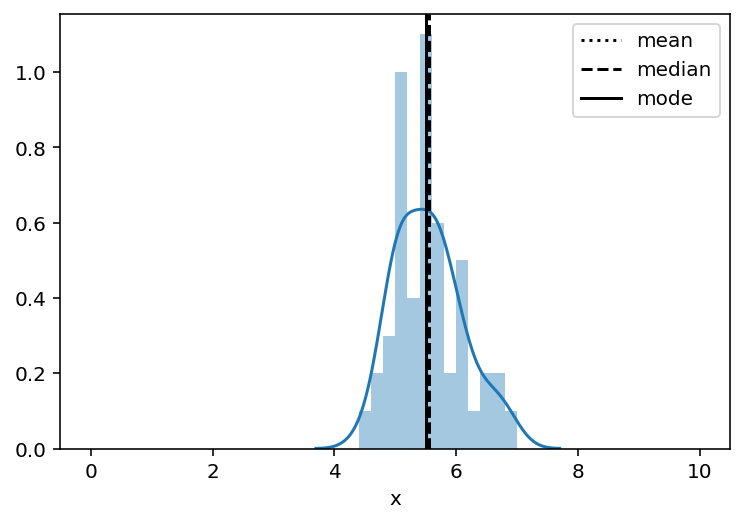

In [45]:
sample_statistics(x, 50)

구간이 100일때
mean :  5.552
median :  5.55
mode :  5.050000000000001


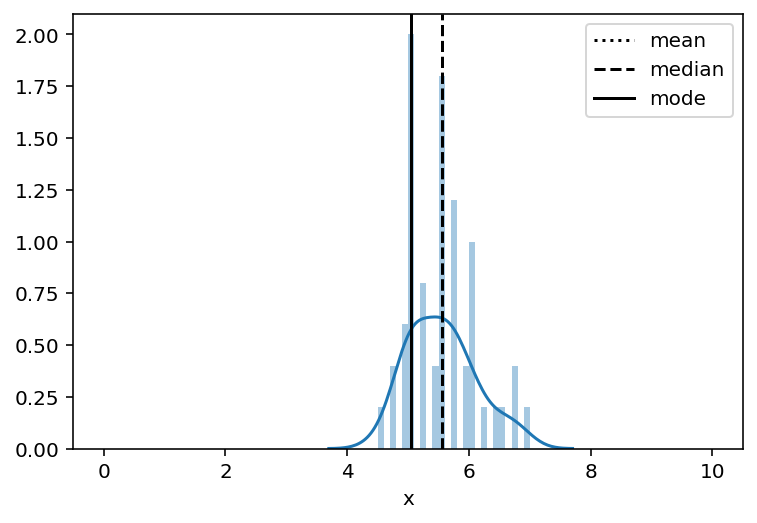

In [46]:
sample_statistics(x, 100)